# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [21]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt


sharkdata = pd.read_excel('GSAF5.xls')

sharkdata.to_csv('sharkdata.csv', index=False)
sharkdata = pd.read_csv('sharkdata.csv')

sharkdata.dropna(axis=1, how='all', inplace=True)

sharkdata['Year'].describe()


In [ ]:
sharkdata.head(10)
sharkdata['Year'].describe()

'''
'Year' is currently a float, with each year having a .0 at the end of it
'''

count    6990.000000
mean     1935.018598
std       272.082794
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64

In [24]:
sharkdata['Year'] = pd.to_numeric(sharkdata['Year'], errors='coerce')
sharkdata.dropna(subset=['Year'], inplace=True)
sharkdata['Year'] = sharkdata['Year'].astype(int)

sharkdata.head(10)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-12-29 00:00:00,2024,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-12-29 00:00:00,2024,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-12-28 00:00:00,2024,Unprovoked,Australia,Queensland,Humpy Island Great Keppel Island,Spearfishing,Luke Walford,M,40,...,Unknown,Todd Smith Glen Folkard ABC News: The North We...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-12-02 00:00:00,2024,Unprovoked,Australia,Queensland,Curtis Island Near Gladstone QLD central coast,Spearfishing,Not stated,M,60+,...,Not stated,Glen Folkard GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-01 00:00:00,2024,Unprovoked,Australia,Western Australia,Greenough River Mouth Beach Cape Burney 12km s...,Surfing,James Sweetman (child),M,?,...,1m shark species unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


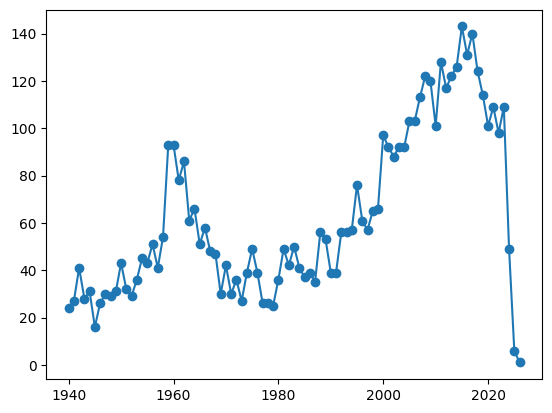

In [30]:
sd1940 = sharkdata[sharkdata['Year'] >= 1940]

sdcounts = sd1940['Year'].value_counts().sort_index()
plt.plot(sdcounts.index, sdcounts.values, marker='o')
'''
It appears that there was a spike in  occurences around the year 1960, with a then steady increase in occurences up to about 2019. 
Tbe decline seen in 2020 is likely due to the pandemic, 
and the sharp drop is likely for 2025 where not much data has populated yet due to the data being pulled in february 
'''

0     12
1     37
2     23
3     40
4     28
5     69
6     48
7     40
10    57
11    24
Name: Age, dtype: int64


Text(0, 0.5, 'Frequency')

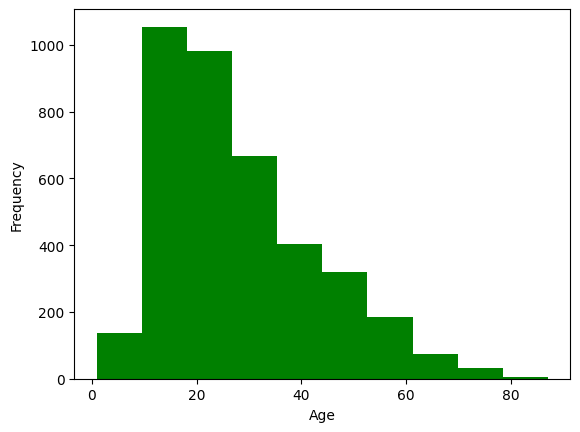

In [38]:
sharkdata['Age'].describe()
import pandas as pd
sharkdata = pd.read_excel('GSAF5.xls')
sharkdata['Age'] = pd.to_numeric(sharkdata['Age'], errors='coerce')
sharkdata.dropna(subset=['Year'], inplace=True)
sharkdata.dropna(subset=['Age'], inplace=True)
sharkdata['Age'] = sharkdata['Age'].astype(int)
print(sharkdata['Age'].head(10))

plt.hist(sharkdata['Age'], color = "green")
plt.xlabel("Age")
plt.ylabel("Frequency")


In [47]:
sdsex = sharkdata['Sex']
sdsex.head(11)

sdsex.describe()
sdmaleprop = sdsex[sdsex == 'M'].count() / sdsex.count()
print(sdmaleprop * 100, '% of responses are from males')


85.2103475307029 % of responses are from males


In [52]:
types = ['Provoked','Unprovoked']

sharkdata['Type'] = sharkdata['Type'].apply(lambda x: x if x in types else 'Unknown')

sdtype = sharkdata['Type']

sdunprovoked = sdtype[sdtype == 'Unprovoked'].count() / sdtype.count()
print(sdunprovoked * 100, '% of responses are unprovoked')

83.21243523316062 % of responses are unprovoked


In [53]:
types2 = ['Y','N']

sharkdata['Fatal Y/N'] = sharkdata['Fatal Y/N'].apply(lambda x: x if x in types else 'Unknown')



In [ ]:
'''
sharkdata['Species'] = sharkdata['Species'].fillna('')

white_shark_attacks = sharkdata['Species'].str.lower().str.contains('white shark').sum()

total_attacks = sharkdata.shape[0]

proportion_white_shark_attacks = white_shark_attacks / total_attacks

print(f"Proportion of attacks by white sharks: {proportion_white_shark_attacks:.2%}")
'''

KeyError: 'Species'

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

### 1
The most recent US Census asked two separate race questions: the first asked whether one was hispanic or non hispanic, providing several tickboxes for hispanic origin and an open response answer for other options. The second question offers tickboxes for race, including open response boxes within race tickboxes.
### 2
These data can be collected to discover trends or issues that may be unfairly affecting certain racial groups (or other groups in the census) more than others. These data can be used to inform political decisions that can help to uplift certain groups in need, or make decisions with a better understanding of who is being governed. Having high-quality data is important for the data to be useful and interpretable. If the data is not accurate and thorough, wrong interpretations of the population could be made.
### 3
One way that the census was done well was its commitment to including as much data as possible, allowing for specifications of questions so that all possible responses could be included and most were placed into a box that fit them. One area I did not see on the census form I read was religion, which I think could be a beneficial and informative variable to have collected. I understand the challenges with collecting that data, however. Adopting a tickbox & free response conjoined method is useful for collecting a combination of more easily usable data and specific data that could allow for greater understanding of data collected in other areas.
### 4
The Census asked for a person to specify their sex as male or female; no information was collected on gender identity. A major issue with this is that a significant portion of the US population has a gender identity that is not well described by their sex as would be listed on the form, and this valuable data and understanding of their identity is completely left out of the form.
### 5
One major concern I have is that certain responses for race or gender could be disregarded in the data cleaning process if it is not deemed as significant or important enough to warrant being counted. If certain values are 'too difficult' to clean, that information that reflects someone's identity could be easily discarded in the name of data cleaning. Effort and policy must be made to preserve accurate responses in respect to their reflection of individual characteristics.
### 6
One of the concerns of using an algorithm is that the algorithm will reflect the bias of the developer. An algorithm is also non-discriminant, failing to consider the importance of certain values or be able to read that one value is intended to fit in a category but would not be done so by an algorithm. 